In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

try :
    from user_engagement import *
except ImportError :
    print('Import not done')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df_tele = load_data("C:\\Users\\Aman\\Desktop\\kifyaw2\\data\\telecom.csv")
# df_tele

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
# Sesions frequency
sessions_frequency = df_tele.groupby('IMSI')['Bearer Id'].nunique()


In [6]:
# Duration of the sesion
session_duration = df_tele.groupby('IMSI')['Dur. (ms)'].sum()

In [7]:
# sesions total trafic
total_traffic = df_tele.groupby('IMSI').agg({'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'})

In [8]:
# combining sll metrics

engagement_metrics = pd.DataFrame({
    'Sessions Frequency': sessions_frequency,
    'Total Duration (ms)': session_duration,
    'Total DL (Bytes)': total_traffic['Total DL (Bytes)'],
    'Total UL (Bytes)': total_traffic['Total UL (Bytes)'],
})


In [9]:
# top 10 costomers in each metrics
top_10_sessions = top_10(engagement_metrics,"Sessions Frequency")
top_10_sessions = top_10(engagement_metrics,"Total Duration (ms)")
top_10_sessions = top_10(engagement_metrics,"Total DL (Bytes)")
top_10_sessions = top_10(engagement_metrics,"Total UL (Bytes)")

**Normalize Metrics and Run K-Means Clustering**

In [11]:
# normalizing metrics
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Duration (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']])

In [12]:
# Run K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

In [13]:
# compute metricses for each cluster
cluster_summary = engagement_metrics.groupby('Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
}).reset_index()

**Visualize Results **

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

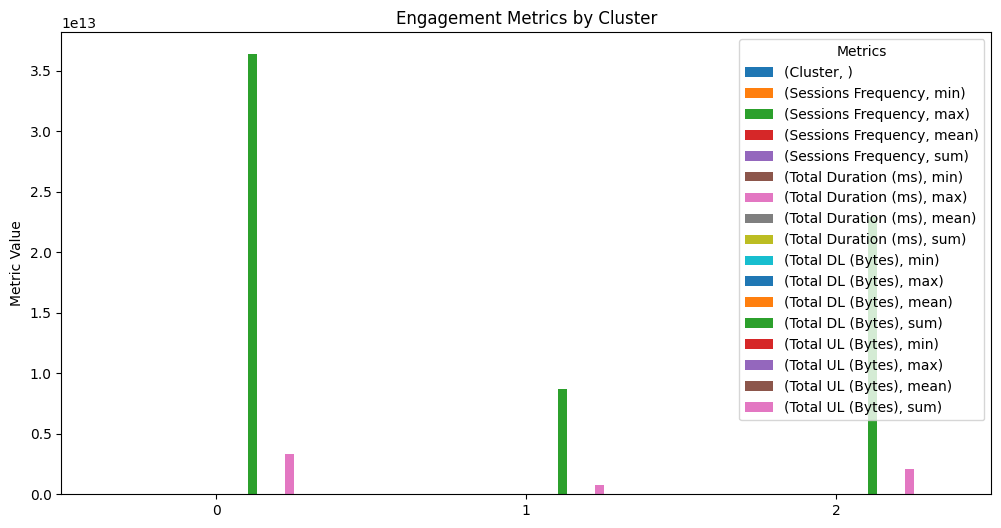

In [14]:
# Plot cluster summary
cluster_summary_plot(cluster_summary)


**Aggregate User trafffic per application**

In [15]:
# Assuming you have application columns in the dataset
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
traffic_per_app = df_tele.groupby('MSISDN/Number')[applications].sum()

In [18]:
# Top 10 most engaging users
top_users_per_app = {app: traffic_per_app.nlargest(10, app) for app in applications}

**Plot Top 3 most used Application**

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

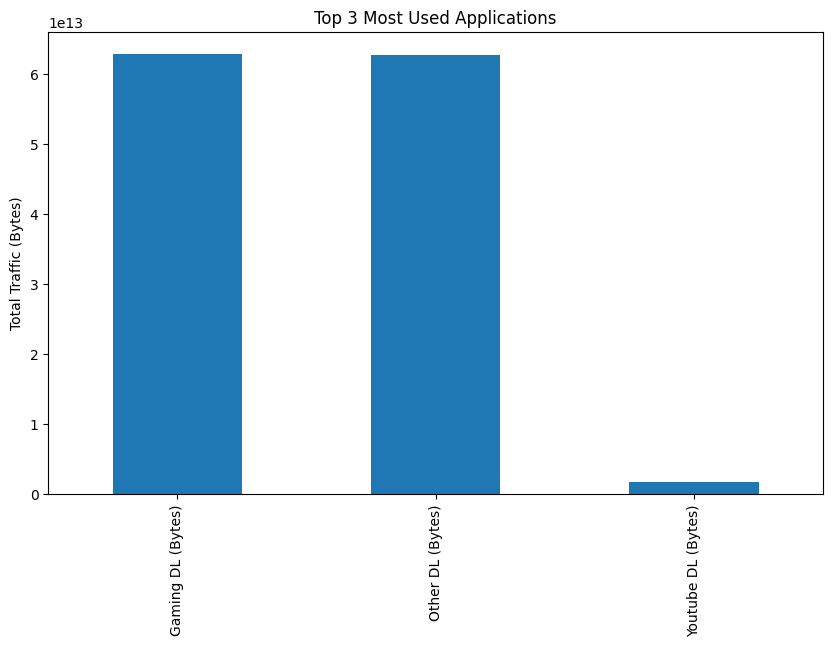

In [19]:
# Top 3 most used apps
top_applications = traffic_per_app.sum().nlargest(3)
top_applications_plot(top_applications)


<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

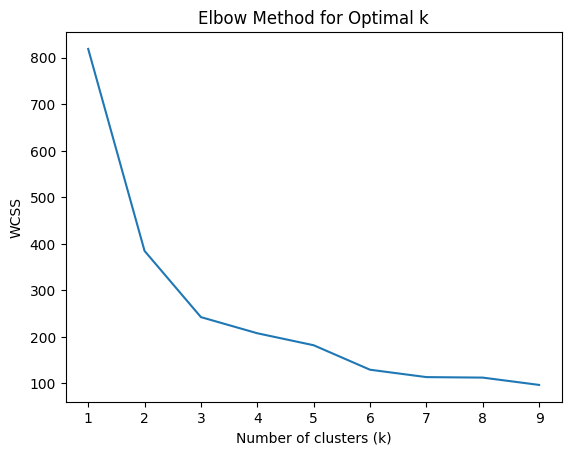

In [20]:
# Optimizing K for clustering
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

wcss_plot(wcss)
